# Data Science - Minneapolis & St. Paul Public Safety  Analysis    Capstone Project

Afewerk Nune, May 6th, 2019

## I. Definition
- ### Project Overivew

It's not unusual to hear about police safety personal power usage, stop and frisk, gender, and racial biases through the overwhelming media available. That incident usually then followed by a response from police and relatives of the person stopped by the police. These social interactions have been with us for centuries but what changed this time, is the level of awareness and people’s tangible reaction to each incidents. The goal of this report is to quantify the past 910 days of data and clarify how and when the police stop data correlates with media and not.

This report examines statistical Police stop data from 5 precincts in Minneapolis & St. Paul during Oct 31, 2016 to Apr 29, 2019. There are 119924 data points with 20 columns full of raw data. In this report we'll be using most of the columns to gain insight in to how public safety response, handling of each case, population demographics, and police use of power among certain groups. Furthermore, it also tests for racial bias, and neighborhoods using statistical methods and visualization plots.

This data only focuses on www.minneaplicemn.gov reported data and not including how the data was collected or maintained. It is also possible that some agencies report only if there are injuries, potential injuries, or verbal complaints (of involved suspects or citizens) as a result of a confrontation.

- ### Problem Statement

Problem to solve: Examine how each precinct police officers handled calls for given areas. Also test the data for bias in gender, race, economic and demographics. Give in-depth analysis of outliers and show predictions for future outcome.

## II. Analysis
- ### Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

All of the top 3 libraries will be used in much of this project. The __pandas__ and __numpy__ library will be the most used because of the available tools and features for data analysis. The next one would be the plotting library __"Matplotlib"__ along with __"%matplotlib inline",__ which would be used to create visualizations for the select dataset. 

for these report, we're going to use a Policfor this project also downloaded from www.minneapolismn.gov/opendata

In [2]:
df = pd.DataFrame(pd.read_excel('data\Police_stop_data.xlsx'))
#Printing the shape of thid data
Time_span = (df['responseDate'].max() - df['responseDate'].min());
print('This dataset has {} raws, {} columns and spans {} days.'.format(df.shape[0], df.shape[1], Time_span))

This dataset has 119924 raws, 19 columns and spans 910 days 00:00:00 days.


In [3]:
df.columns

Index(['OBJECTID', 'masterIncidentNumber', 'responseDate', 'Non-Usable',
       'responseTime', 'responseCode', 'citationIssued', 'personSearch',
       'vehicleSearch', 'preRace', 'race', 'gender', 'lat', 'long', 'x', 'y',
       'policePrecinct', 'neighborhood', 'lastUpdateDate'],
      dtype='object')

As we can see from above, we have responseDates, time, search type, race, gender, geolocation, pricinct, and neighbourhood data values we can work with for this analysis. PreRace, Race, gender and neighbourhood would be looked at in detail to give us insight about racial bias, gender disparity, and post stop actions taken by officers. 

In [4]:
#Lest see how the data points are populated using central tendency statistics
df_race_mean = df['responseDate'].value_counts()
df_race_mean.describe()

count    911.000000
mean     131.639956
std       38.932739
min        7.000000
25%      104.000000
50%      129.000000
75%      159.000000
max      285.000000
Name: responseDate, dtype: float64

It looks like there have been 911 days worth of police stops with in the 5 precincts. The minimum stops with in the given period is 7 stops and a maximum of 285 stops per day. The average of police stops is at 131 people per day. 

In [5]:
grouped = pd.DataFrame(df.groupby('policePrecinct')['responseDate'].count())
grouped['average'] = grouped['responseDate'] / 911
#grouped.iloc[:,2]
#grouped.set_index('responseDate').count()
len(grouped)
grouped

,responseDate,average
policePrecinct,,
1.0,19237,21.116356
2.0,23446,25.736553
3.0,21528,23.631175
4.0,28653,31.452250
5.0,25839,28.363337


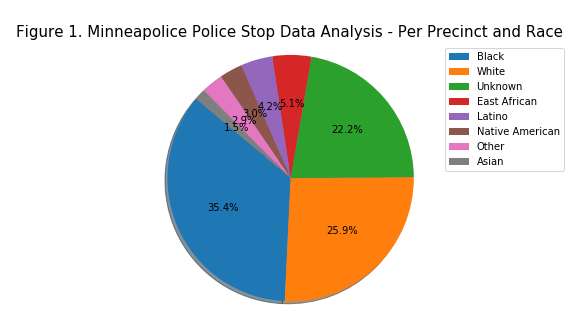

In [6]:
#generating a pie chart with the data racial demographics
Race = []
Race.append(df['race'].value_counts())
plt.figure(figsize=(10, 5))
plt.pie(Race[0], autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(Race[0].index, loc='upper right')
plt.title('\nFigure 1. Minneapolice Police Stop Data Analysis - Per Precinct and Race', size=15)
plt.axis('equal');

According to the 2018 national cences report[2], the Minnesota population demographics are Asians 5.1%, Blacks 6.4% ( including East African), Latinos 5.4%, Native Americans 1.4%, 84% White,..etc. According to this chart, there is more chance the police stops involved a Black person than any other race. 

This data also has 'Unknown' and 'Other' races that we can't quite put in to any of the known Asian, Black, East African, Latino, Native American, and White races. Because the reports from these catagories is large, we can't just ignore the implications of these percentage. To get the true racial catagories, we have to sum 'Black' & 'East African' and 'Unknown' & 'Other' and redraw the pie chart. 

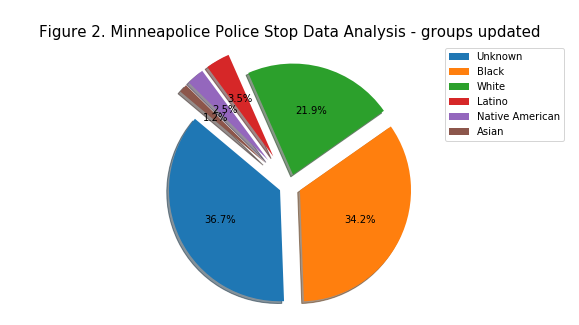

In [7]:
#Adding similar indexes
df1 = df
df['race'] = df['race'].str.replace('Other','Unknown')
df['race'] = df['race'].str.replace('East African','Black')
fill = ['preRace','race', 'gender']
df.update(df.fillna('Unknown', inplace=True))
df.update(df.fillna('Black', inplace=True))

#Create a new list and redraw the pie chart
Race1 = []
Race1.append(df['race'].value_counts())
plt.figure(figsize=(10, 5))
plt.pie(Race1[0], explode=(0.1,0.1,0.1,0.3,0.3,0.3),autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(Race1[0].index, loc='upper right')
plt.title('\nFigure 2. Minneapolice Police Stop Data Analysis - groups updated', size=15)
plt.axis('equal');

This 2nd pie chart shows the data with 'Black' & 'East African' grouped as 'Black' and 'Unknown' & 'Other' grouped as 'Unknown'. The majority of police stop data still involves Blacks with greater proportion from all other races. In reality, the larger portion of Minnesota Black Population lives in with in Minneapolis & St. Paul areas but in no way is quite proportional to the disparity shown on the graph. The next group being stoped are the Unknown with 2.5% higher than the Black race. Since we don't have any insite in to this catagory, we can't say much about this group. 

According to the 2018 Cencus[2] data, the Black & Latino Races are 6.5% and 5.4% totally in Minnesota. On the other hand, the police Stop Data[1] in these 5 precincts show 34.2% and 3.5% for Blacks and Latinos. That is a 30.2% increase for Blacks and 2.0% reduction for Latinos when comparing to each other with respect to the total population percentage. "Do two visializations of the cencus data side by side instead of the last analysis.

In [8]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
plotly.tools.set_credentials_file(username='username', api_key='key')

mapbox_access_token = 'TYPE YOUR TOKEN Here'

#getting long and lat coordinates
df2 = df.sample(50)
lat = df2['lat'].values
lon = df2['long'].values
#neighbourhood = df['neighborhood'].unique()

#scatter points and marker
data = [go.Scattermapbox(lat = df['lat'], lon = df['long'], mode='markers',
                         marker=dict(size=17, color='rgb(255,0,0)', opacity=0.7),
                         #text=neighbourhood, hoverinfo='neighborhood'
                        ),
        go.Scattermapbox(lat = df['lat'], lon = df['long'], mode='markers',
                         marker=dict(size=8, color='rgb(242, 177, 172)', opacity=0.7),
                         #hoverinfo='none'
                        ),
       ]
layout = go.Layout(title='Figure 2. Minneapolis Precincts 1 to 6 Police Stop data from 2016 to 2019',
                   autosize=True, hovermode='closest', showlegend=False,
                   mapbox=dict( accesstoken='mapbox_access_token'
                               center=dict(lat=44.973252,lon=-93.260516),
                                pitch=0,
                                zoom=10 ),
)

fig = go.Figure(data=data, layout=layout)
#py.iplot(fig, filename='Jupyter-MN Police Stop Data demographics');

Incert plotly image here.

In [14]:
#Now le's plot a time series plots and analyse how the data collected populated throughout time.
value_perdate = df.groupby(['race','responseDate'])['responseDate'].value_counts()
precinct_01 = df.loc[df['policePrecinct'] == 1]
y = df.loc[df['race'] == 'Black'].count()
#value_perdate

The above picture shows the 5 police precincts geographically and we can clearly tell precincts 3,4,5 are somewhat physically bigger than precinct 4 where the majority of the crime being reported by specifically blacks is significantly bigger than the higher of all precincts.

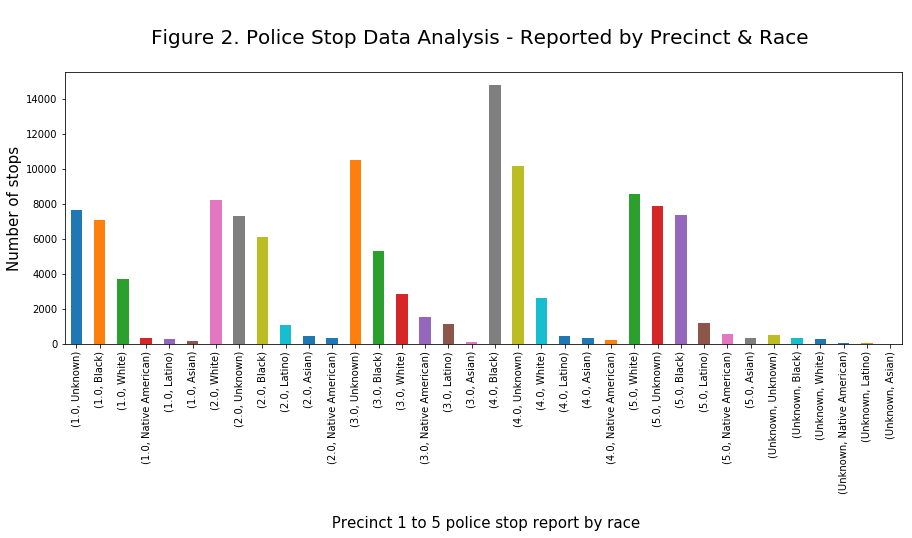

In [10]:
#Now lets look at these race desparity per pricinct and neighbourhood
plt.figure(figsize=(15,5))
df.groupby('policePrecinct')['race'].value_counts().plot(kind='bar');
plt.title('\nFigure 2. Police Stop Data Analysis - Reported by Precinct & Race \n', size=20)
plt.ylabel('Number of stops' , size=15)
plt.xlabel('\n Precinct 1 to 5 police stop report by race' , size=15);

These data revels more insight that we couldn't tell from the pie chart or the map. For District 2 and 5, a person of white race is more prone to be stopped than other races. It might also be because the white race is proportionally greater and the graph is just showing what is expected.

The next big race with small percentage change is blacks, followed by East Africans. If we look at districts 1, 3, and 4, Black people are more frequently stopped than others followed by unknown and whites. For district 4 specifically, the ratio of blacks being stopped is so high, it’s the outlier for the entire police stop per race for all district. The next part is to get the actual probability rate for each race in different precincts. We can also see that, the Asian Race being stopped by police is much lower than any other race in all precincts.

Next, let's see how the data is shapped with in the 910 days period of time.

In [11]:
df['race'].isna().sum()

0

In [12]:
time_series = df.groupby('race')['responseDate','neighborhood'].describe()
time_series

responseDate                                   \
                       count unique                  top freq   
race                                                            
Asian                   1473    710  2018-07-19 00:00:00   10   
Black                  40974    911  2017-03-31 00:00:00  102   
Latino                  4222    889  2017-04-11 00:00:00   16   
Native American         3048    846  2017-08-24 00:00:00   14   
Unknown                43994    911  2017-09-22 00:00:00   99   
White                  26213    910  2018-07-19 00:00:00   85   

                                                          neighborhood         \
                               first                 last        count unique   
race                                                                            
Asian            2016-11-01 00:00:00  2019-04-29 00:00:00         1473     83   
Black            2016-10-31 00:00:00  2019-04-29 00:00:00        40974     88   
Latino           2016-11-01 00:00:00  2019-04-29 00:00:00         4222     87   
Native American  2016-11-01 00:00:00  2019-04-28 00:00:00         3048     79   
Unknown          2016-10-31 00:00:00  2019-04-29 00:00:00        43994     88   
White            2016-11-01 00:00:00  2019-04-29 00:00:00        26213     88   

                                                 
                           top  freq first last  
race                                             
Asian             Marcy Holmes   102   NaN  NaN  
Black            Downtown West  4303   NaN  NaN  
Latino                Whittier   366   NaN  NaN  
Native American  East Phillips   648   NaN  NaN  
Unknown          Downtown West  4349   NaN  NaN  
White            Downtown West  2102   NaN  NaN

### Table 1. Population distribution grouped by race, responseDate and neighborhood

The above table is a summary of the police data per race, date of response and citation issued or not. The report shows that the max values Black, Unknown, and White are 400% higher than that of Asian, East African, Latino, Native American, and Other values. We kow that East African decents are also considered that of Black race and we have to add the two to see the real value per race. Following that, we have to see the minority catagoreis percentage to that of White, Other, and Unknown race.

In [13]:
percentages = pd.DataFrame()
df1 =df.groupby('race').count()
percentages['Racial'] = df1['responseDate'][[0,1,2,3,4,5]]
percentages['MN_Pop (%)'] = [5.1,6.5,5.4,1.5,2.5,84.4] 
percentages.index = df1.index 
percentages['div_cooficient'] = percentages['Racial'] / percentages['Racial'].sum()
percentages['pop_percentages (%)'] = percentages['div_cooficient'] * 100
percentages['expected_pop'] = round((percentages['MN_Pop (%)'] * percentages['Racial'].sum()), 2)
percentages['expected_pop_percentage (%)'] = (percentages['pop_percentages (%)']/100) * percentages['expected_pop']
percentages

,Racial,MN_Pop (%),div_cooficient,pop_percentages (%),expected_pop,expected_pop_percentage (%)
race,,,,,,
Asian,1473,5.1,0.012283,1.228278,611612.4,7512.3
Black,40974,6.5,0.341666,34.166639,779506.0,266331.0
Latino,4222,5.4,0.035206,3.520563,647589.6,22798.8
Native American,3048,1.5,0.025416,2.541610,179886.0,4572.0
Unknown,43994,2.5,0.366849,36.684900,299810.0,109985.0
White,26213,84.4,0.218580,21.858010,10121585.6,2212377.2


### Table 2. Population count from 2018 census report and proportional comparison to police stop data report

## III. Methodology

- ### Getting the data & Data Processing

The data is collected from the www.minneapolismn.gov/opendata readily available for public at anytime. Although there are multiple formats available to download, excel format is used for this report. 

The responseDate column had data, time, and code at first. Since there is only one time data in the response date, the time values have been dropped from analysis. The codes 'T' & '000Z' have been placed at the beggining & end of the responseDate time values also have been dropped. 

For manupulation data numpy padas, and matplotlib libraries have been used to calculate, analyze and plots for visualizations. The data is fed using pandas Dataframe module and used throughtout the code.  

## IV. Results and Conclusions

The findings on these report ranges varies based on 

## V. Future Improvements

This report could be well presented using more visualizations and tables of values either calculated or grouped. More probability calculations would help readers grasp the data better if computed for each neighborhoods, race, gender, ethnicity and age groups. In this report the major calculations done are central tendency's, percentages, and probabilities. With umple time and technical development, the listed values could be more elaborated to give insite in to the broader Minnesota and not only the 5 precincts. 

## References

1. Opendata.mninneapolismn.gov. (2019). Police Stop Data. [online] Available at: http://opendata.minneapolismn.gov/datasets/police-stop-data [Accessed 28 Apr. 2019].

2. Census Bureau QuickFacts. (2019). U.S. Census Bureau QuickFacts: Minnesota. [online] Available at: https://www.census.gov/quickfacts/fact/table/mn/PST045218 [Accessed 3 May 2019].